In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Fixed Wing Dataset

In [4]:
fw_df = pd.read_csv('FW_tail_numbers(cleaned).csv', header = 'infer')

In [5]:
fw_df.head()

,Wing_type,tail_number,dates,aircraft,origin,destination,departure,arrival,duration,NAME,Duration(mins)
0,FW,N7025P,24-Dec-20,NaN,"Near Red Bluff, CA","Near Emigrant Gap, CA",09:25AM PST,10:02AM PST,0:36,A PRECIOUS LIFE FLIGHT LLC ...,36
1,FW,N7025P,27-Nov-20,NaN,Redding Muni,"Near Chico, CA",11:26AM PST,11:42AM PST,0:16,A PRECIOUS LIFE FLIGHT LLC ...,16
2,FW,N269GJ,18-Dec-20,LJ60,Aurora Muni,Fort Lauderdale Exec,08:53AM CST,12:20PM EST,2:26,AEROCARE MEDICAL TRANSPORT SYSTEM INC ...,146
3,FW,N888CP,11-Feb-21,LJ31,Aurora Muni,Aurora Muni,10:32AM CST,11:25AM CST,0:53,AEROCARE MEDICAL TRANSPORT SYSTEMS INC ...,53
4,FW,N888CP,24-Jan-21,LJ31,Akron-Canton Rgnl,Aurora Muni,04:41PM EST,04:58PM CST,1:17,AEROCARE MEDICAL TRANSPORT SYSTEMS INC ...,77


In [6]:
fw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13031 entries, 0 to 13030
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Wing_type       13031 non-null  object
 1   tail_number     13031 non-null  object
 2   dates           13031 non-null  object
 3   aircraft        13005 non-null  object
 4   origin          13030 non-null  object
 5   destination     13031 non-null  object
 6   departure       13031 non-null  object
 7   arrival         12788 non-null  object
 8   duration        12783 non-null  object
 9   NAME            13031 non-null  object
 10  Duration(mins)  13031 non-null  object
dtypes: object(11)
memory usage: 1.1+ MB


In [7]:
# Check count of null values for the fixed wing dataset
fw_df.isna().sum()

Wing_type           0
tail_number         0
dates               0
aircraft           26
origin              1
destination         0
departure           0
arrival           243
duration          248
NAME                0
Duration(mins)      0
dtype: int64

In [8]:
# Let's drop null values
fw_df = fw_df.dropna()

In [9]:
# Let's check any duplicates 
fw_df.duplicated().sum()

0

### Let's perform analysis for the fixed wing dataset

In [10]:
pd.DataFrame(fw_df.NAME.unique(), columns=['Air Medical Service Names'])

,Air Medical Service Names
0,AEROCARE MEDICAL TRANSPORT SYSTEM INC ...
1,AEROCARE MEDICAL TRANSPORT SYSTEMS INC ...
2,AEROMED TRANSPORT CO LLC ...
3,AIR AMBULANCE BY AIR TREK INC ...
4,AIR MEDICAL SERVICES LLC ...
5,AIR METHODS CORP ...
6,AIR METHODS CORPORATION ...
7,AIRMD LLC ...
8,AIRMD LLC DBA ...
9,AIRMED INTERNATIONAL LLC ...


The fixed wing data represents 45 unique air medical services. Let us count aircrafts with tail numbers.

In [106]:
pd.DataFrame(fw_df.groupby("NAME").tail_number.nunique().sort_values(ascending=False))

,tail_number
NAME,
AIR METHODS CORP,18
GUARDIAN FLIGHT LLC,12
AIRMD LLC,8
AIRMED INTERNATIONAL LLC,7
COOK CHILDRENS HEALTH ENTERPRISES,3
REACH AIR MEDICAL SERVICES LLC,3
NORTHEAST MONTANA STAT AIR AMBULANCE COOPERATIVE,3
METRO WEST AMBULANCE,2
BISMARCK AIR MEDICAL LLC,2


Let us visualize top 10 service provider having total unique tail numbers

In [39]:
tailnum_df = pd.DataFrame(fw_df.groupby("NAME").tail_number.nunique().sort_values(ascending=False)).reset_index()

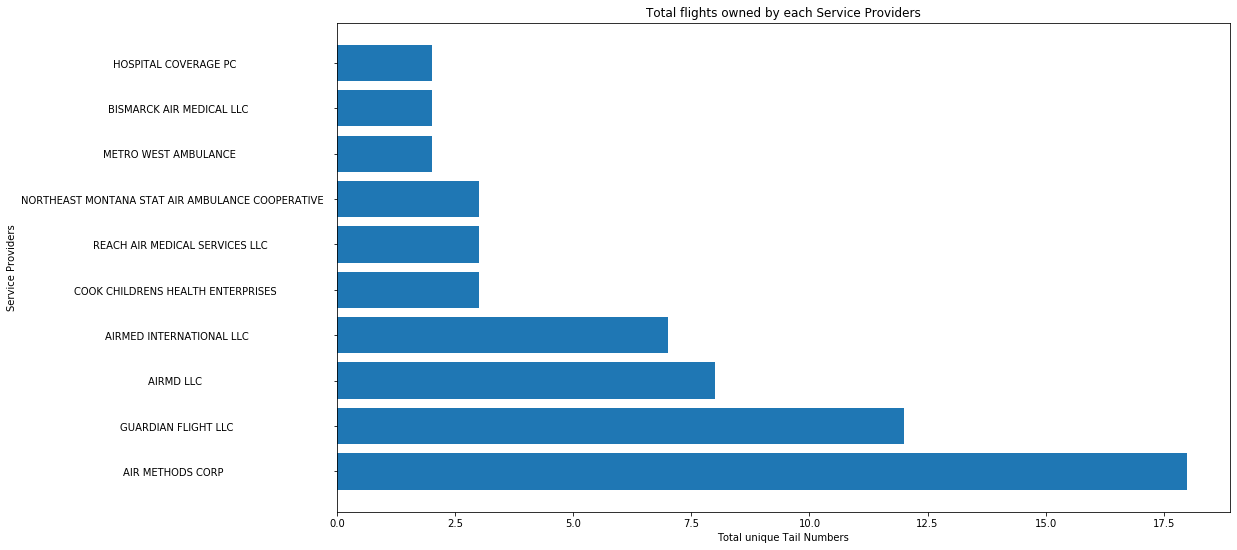

In [99]:
serv_name = tailnum_df.NAME.head(10) 
tail_count = tailnum_df.tail_number.head(10)
  
fig, ax = plt.subplots(figsize =(16, 9))  
ax.barh(serv_name, tail_count) 
  
ax.set_title("Total flights owned by each Service Providers")
plt.xlabel("Total unique Tail Numbers")
plt.ylabel("Service Providers")  
plt.show() 

In [105]:
pd.DataFrame(fw_df.NAME.value_counts()).rename(columns={"NAME":"Total Services"})

,Total Services
AIR METHODS CORP,3624
GUARDIAN FLIGHT LLC,1816
AIRMD LLC,1402
AIRMED INTERNATIONAL LLC,691
REACH AIR MEDICAL SERVICES LLC,553
NORTHEAST MONTANA STAT AIR AMBULANCE COOPERATIVE,524
MERCY FLIGHTS INC,345
SAN JUAN REGIONAL MEDICAL CENTER INC,322
LIFE FLIGHT NETWORK LLC,320
CRITICAL CARE SERVICES INC DBA,300


Let us visualize top 10 most service providers

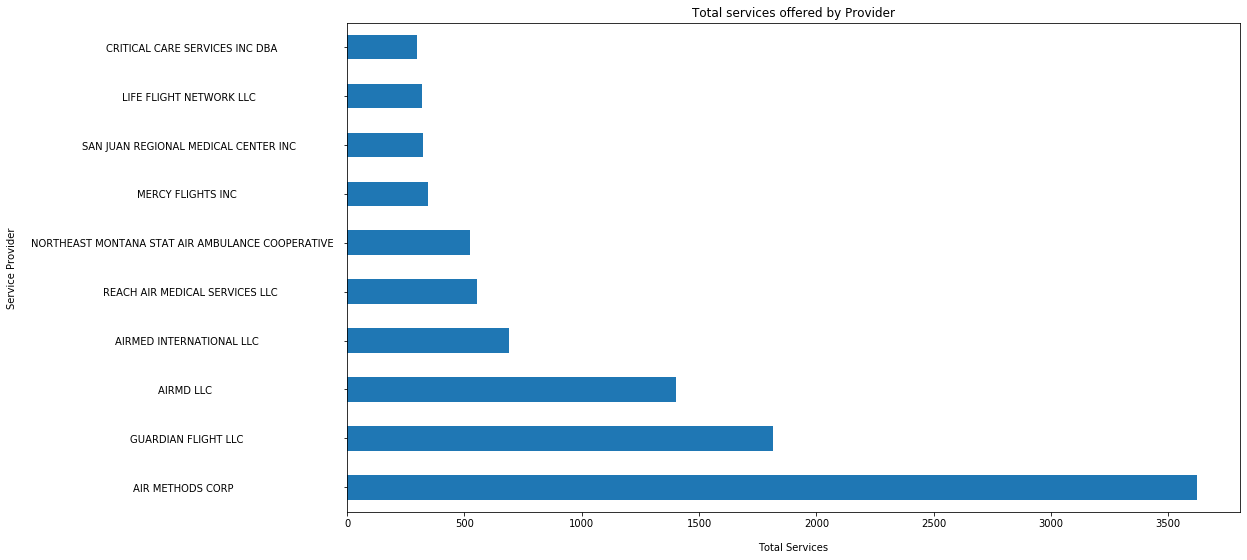

In [104]:
fw_df.NAME.value_counts().head(10).plot(kind='barh', figsize=(16, 9)) 
plt.xlabel("Total Services", labelpad=14)
plt.ylabel("Service Provider", labelpad=14)
plt.title("Total services offered by Provider")
plt.show()

In [13]:
# Convert data type of date from object to date time
fw_df["dates"] = fw_df['dates'].astype('datetime64[ns]')

In [14]:
# Count number of flight for each departure day
num_flights = pd.DataFrame(fw_df.dates.value_counts()).sort_index()
num_flights.head()

,dates
2020-10-30,18
2020-10-31,75
2020-11-01,100
2020-11-02,82
2020-11-03,95


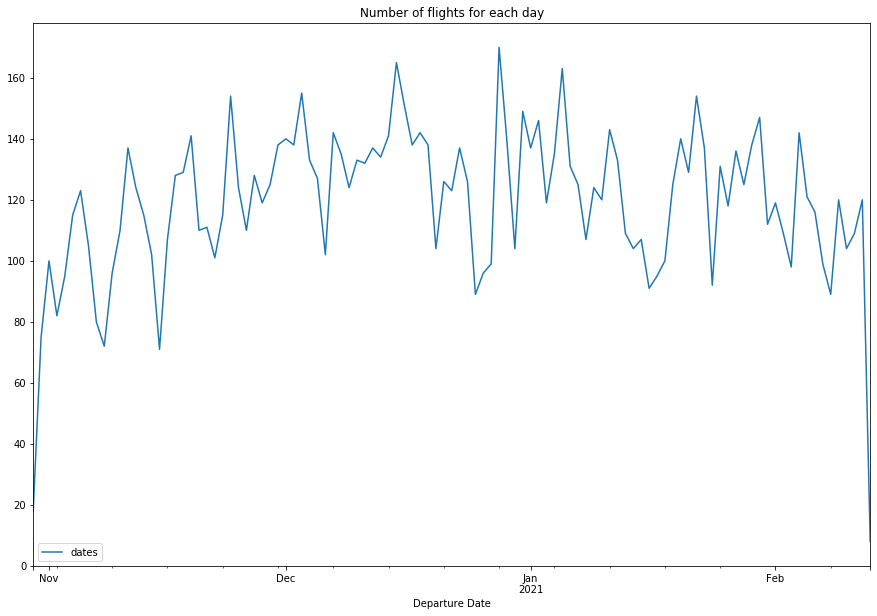

In [15]:
# Let's visualize the number of flight for each day

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
num_flights.plot(ax=ax)
plt.title("Number of flights for each day")
plt.xlabel("Departure Date")
plt.legend(loc = "lower left")
plt.show()

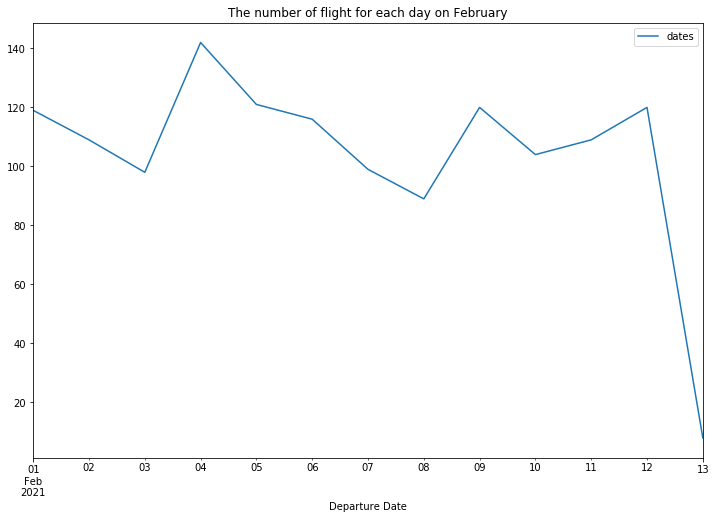

In [16]:
# Look closer to the February
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
num_flights.loc["Feb-2021"].plot(ax=ax)
plt.title("The number of flight for each day on February")
plt.xlabel("Departure Date")
plt.show()

Now, let's analyze flight duration!

In [17]:
# Convert data type of Duration(mins) from object to numeric
fw_df['Duration(mins)'] = pd.to_numeric(fw_df['Duration(mins)'], errors='coerce')

In [19]:
# Group by date and take average of flight duration
avg_duration = fw_df.groupby([fw_df.dates])['Duration(mins)'].mean().reset_index(name='Average Duration')
avg_duration.head()

,dates,Average Duration
0,2020-10-30,59.833333
1,2020-10-31,52.013333
2,2020-11-01,60.720000
3,2020-11-02,54.512195
4,2020-11-03,58.989474


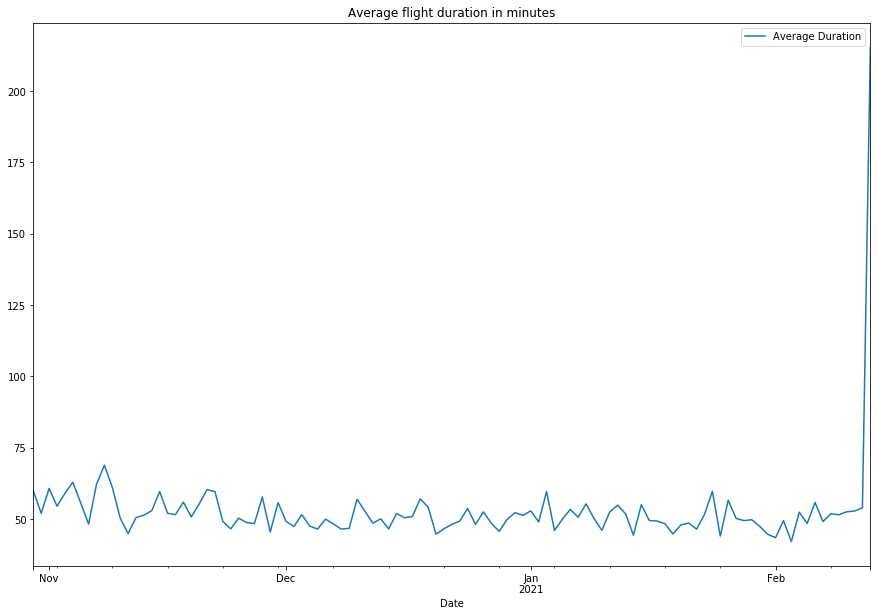

In [21]:
# Let's visualize the average duration
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
avg_duration.plot(x='dates', y='Average Duration', ax=ax)
plt.title("Average flight duration in minutes")
plt.xlabel("Date")
plt.show()